<h1>Playground</h1>

In [1]:
import sys
if '/home/ross/immunova' not in sys.path:
    sys.path.append('/home/ross/immunova')
from immunova.data.fcs_experiments import FCSExperiment
from immunova.flow.gating.actions import Gating
from immunova.flow.gating.defaults import ChildPopulationCollection
from immunova.flow.gating.utilities import centroid, multi_centroid_calculation
from immunova.flow.plotting.static_plots import Plot
from immunova.data.mongo_setup import test_init
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix
from sklearn.neighbors import KDTree
from sklearn.cluster import DBSCAN, KMeans
from multiprocessing import Pool, cpu_count
from functools import partial
from itertools import cycle
from datetime import datetime
from matplotlib.patches import Rectangle, Ellipse
from matplotlib.colors import LogNorm
import matplotlib.pyplot as plt
from scipy.spatial import ConvexHull
import pandas as pd
import numpy as np
import functools
import warnings
import os
warnings.filterwarnings('ignore')
test_init()

NameError: name 'Cluster' is not defined

In [4]:
exp = FCSExperiment.objects(experiment_id='ILTIS_T1').get()

In [12]:
samples = exp.list_samples()

In [5]:
hc = Gating(exp, 'hc1')

In [6]:
hc.populations.keys()

dict_keys(['root', 'cells', 'debris', 'manual_lymphocytes', 'manual_lymphocytes_NEG', 'manual_liveCD3', 'manual_liveCD3_Neg', 'manual_gdt', 'manual_gdtNEG', 'manual_nongdt', 'manual_nongdtNEG', 'gmm_lymphocytes', 'gmm_lymphocytes_NEG', 'dbscan_lymphocytes', 'hdbscan_lymphocytes', 'dens2d_lymphocytes', 'dens2d_lymphocytes_NEG', 'gmm_liveCD3', 'gmm_liveCD3_NEG', 'dbscan_liveCD3', 'hdbscan_liveCD3', 'dens2d_liveCD3', 'dens2d_liveCD3_Neg', 'gmm_gdt', 'gmm_gdtNEG', 'dbscan_gdt', 'dbscan_nongdt', 'dbscan_vd2', 'hdbscan_gdt', 'hdbscan_nongdt', 'hdbscan_vd2', 'dens2d_gdt', 'dens2d_nongdt', 'dens2d_vd2', 'dens2d_noise'])

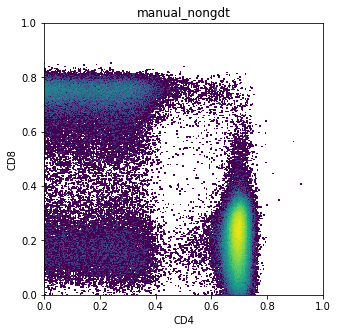

In [9]:
hc.plotting.plot_population('manual_nongdt', 'CD4', 'CD8', transform_x='logicle',
                           transform_y='logicle')

In [ ]:
child_populations = ChildPopulationCollection('cluster')
child_populations.add_population('hdbscan_cd4', target=[0.7, 0.2], weight=1)
child_populations.add_population('hdbscan_cd8', target=[0.2, 0.8], weight=1)

gate_definition = dict(x='CD4', y='CD8', min_pop_size=100, downsample_method='density', frac=0.2)
hc.create_gate(gate_name='hdbscan_gdt', parent='manual_nongdt', class_='DensityBasedClustering', 
               method='hdbscan', kwargs=gate_definition, child_populations=child_populations)
performance = timed_apply(sample_go=hc, task_name='Gamma Delta T cells', gate_name='hdbscan_gdt',
                          performance_record=performance, save=True, plot=False)

In [13]:
for x in samples:
    hc = Gating(exp, x)
    child_populations = ChildPopulationCollection('cluster')
    child_populations.add_population('hdbscan_cd4', target=[0.7, 0.2], weight=1)
    child_populations.add_population('hdbscan_cd8', target=[0.2, 0.8], weight=1)

    gate_definition = dict(x='CD4', y='CD8', min_pop_size=100, downsample_method='density', frac=0.2)
    hc.create_gate(gate_name='hdbscan_cd4cd8', parent='manual_nongdt', class_='DensityBasedClustering', 
                   method='hdbscan', kwargs=gate_definition, child_populations=child_populations)
    hc.apply('hdbscan_cd4cd8', plot_output=False)
    hc.save(overwrite=True)

Error: density dependendent downsampling failed; weights sum to zero. Defaulting to uniform samplings
Saved successfully!
Error: density dependendent downsampling failed; weights sum to zero. Defaulting to uniform samplings
Saved successfully!
Error: density dependendent downsampling failed; weights sum to zero. Defaulting to uniform samplings
Saved successfully!
Error: density dependendent downsampling failed; weights sum to zero. Defaulting to uniform samplings
Saved successfully!
Error: density dependendent downsampling failed; weights sum to zero. Defaulting to uniform samplings
Saved successfully!
Error: density dependendent downsampling failed; weights sum to zero. Defaulting to uniform samplings
Saved successfully!
Error: density dependendent downsampling failed; weights sum to zero. Defaulting to uniform samplings
Saved successfully!
Error: density dependendent downsampling failed; weights sum to zero. Defaulting to uniform samplings
Saved successfully!
Error: density dependend

In [161]:
hc4 = Gating(exp, 'hc4')

In [162]:
child_populations = ChildPopulationCollection('cluster')
child_populations.add_population('hdbscan_mait', target=[0.7, 0.7], weight=1)
child_populations.add_population('classic_tcells', target=[0.4, 0.4], weight=1)

gate_definition = dict(x='Va7.2', y='CD161', min_pop_size=100, downsample_method='density', frac=0.2)
hc4.create_gate(gate_name='hdbscan_mait', parent='manual_nongdt', class_='DensityBasedClustering', 
               method='hdbscan', kwargs=gate_definition, child_populations=child_populations)
hc4.apply('hdbscan_mait', plot_output=False)

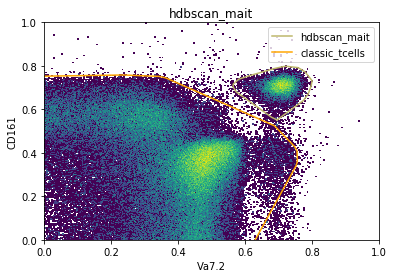

In [163]:
hc4.plotting.plot_gate('hdbscan_mait')

Error: density dependendent downsampling failed; weights sum to zero. Defaulting to uniform samplings


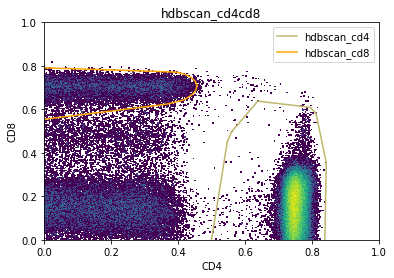

In [165]:
hc4.populations.pop('hdbscan_cd4')
hc4.populations.pop('hdbscan_cd8')
hc4.gates.pop('hdbscan_cd4cd8')

child_populations = ChildPopulationCollection('cluster')
child_populations.add_population('hdbscan_cd4', target=[0.7, 0.2], weight=1)
child_populations.add_population('hdbscan_cd8', target=[0.2, 0.8], weight=1)

gate_definition = dict(x='CD4', y='CD8', min_pop_size=100, downsample_method='density', frac=0.2)
hc4.create_gate(gate_name='hdbscan_cd4cd8', parent='classic_tcells', class_='DensityBasedClustering', 
               method='hdbscan', kwargs=gate_definition, child_populations=child_populations)
hc4.apply('hdbscan_cd4cd8')

In [166]:
labels = ['gmm_gdt', 'hdbscan_cd4', 'hdbsacn_cd8', 'hdbscan_mait']

In [170]:
cd4 = hc4.get_population_df('hdbscan_cd4', transform=True)
cd4['label'] = 'CD4'
cd8 = hc4.get_population_df('hdbscan_cd8', transform=True)
cd8['label'] = 'CD8'
mait = hc4.get_population_df('hdbscan_mait', transform=True)
mait['label'] = 'MAIT'
gdt = hc4.get_population_df('gmm_gdt', transform=True)
gdt['label'] = 'γδ T cells'

In [172]:
data = pd.concat([mait, cd8, gdt, cd4])

In [174]:
data.shape

(263348, 20)

In [175]:
data.columns

Index(['FSC-A', 'FSC-H', 'FSC-W', 'SSC-A', 'SSC-H', 'SSC-W', 'CD57', 'CD161',
       'CD3', 'CCR7', 'L/D', 'Va7.2', 'CD8', 'Vd2', 'CD45RA', 'PanGD', 'CD4',
       'CD27', 'Time', 'label'],
      dtype='object')

In [176]:
data.drop('Time', axis=1, inplace=True)

In [177]:
features = ['FSC-A', 'FSC-H', 'FSC-W', 'SSC-A', 'SSC-H', 'SSC-W', 'CD57', 'CD161',
            'CD3', 'CCR7', 'L/D', 'Va7.2', 'CD8', 'Vd2', 'CD45RA', 'PanGD', 'CD4',
            'CD27']

In [178]:
import umap
import phenograph

In [179]:
reducer = umap.UMAP()
embedding = reducer.fit_transform(data[features])
data['umap0'] = embedding[:, 0]
data['umap1'] = embedding[:, 1]

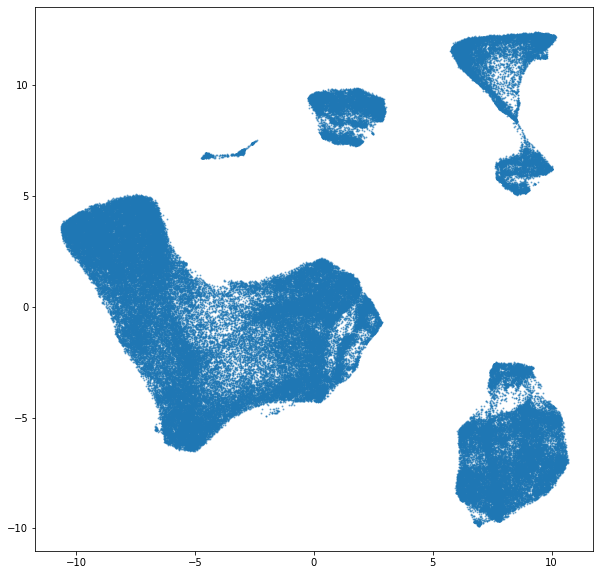

In [180]:
fig, ax = plt.subplots(figsize=(10,10))
s = data.sample(frac=0.5)
ax.scatter(s['umap0'], s['umap1'], s=1, alpha=0.5)
fig.show()

In [181]:
data.columns

Index(['FSC-A', 'FSC-H', 'FSC-W', 'SSC-A', 'SSC-H', 'SSC-W', 'CD57', 'CD161',
       'CD3', 'CCR7', 'L/D', 'Va7.2', 'CD8', 'Vd2', 'CD45RA', 'PanGD', 'CD4',
       'CD27', 'label', 'umap0', 'umap1'],
      dtype='object')

In [182]:
features = [x for x in data.columns if x not in ['umap0', 'umap1', 'label']]
communities, graph, Q = phenograph.cluster(data[features])

Finding 30 nearest neighbors using minkowski metric and 'auto' algorithm
Neighbors computed in 56.06683158874512 seconds
Jaccard graph constructed in 19.880032777786255 seconds
Wrote graph to binary file in 15.38140082359314 seconds
Running Louvain modularity optimization
After 1 runs, maximum modularity is Q = 0.882021
After 4 runs, maximum modularity is Q = 0.883393
After 23 runs, maximum modularity is Q = 0.884545
Louvain completed 43 runs in 821.682425737381 seconds
PhenoGraph complete in 913.4642963409424 seconds


In [183]:
len(set(communities))

28

In [184]:
data['clusters'] = communities

In [190]:
def get_polygon(data, gate_name):
    d = data[data.label == gate_name][['umap0', 'umap1']]
    d = d[(d.umap0 >= d.umap0.quantile(0.1)) & (d.umap0 <= d.umap0.quantile(0.9))].values
    hull = ConvexHull(d)
    polygon_cords = [(d[v, 0], d[v, 1]) for v in hull.vertices]
    return [c[0] for c in polygon_cords], [c[1] for c in polygon_cords]

In [191]:
data['label'].value_counts()

CD4           163340
γδ T cells     55283
CD8            27745
MAIT           16980
Name: label, dtype: int64

In [192]:
labels = ['CD4', 'CD8', 'MAIT', 'γδ T cells']
gate_polygon = dict()
for l in labels:
    x, y = get_polygon(data, l)
    gate_polygon[l] = dict(x=x, y=y)

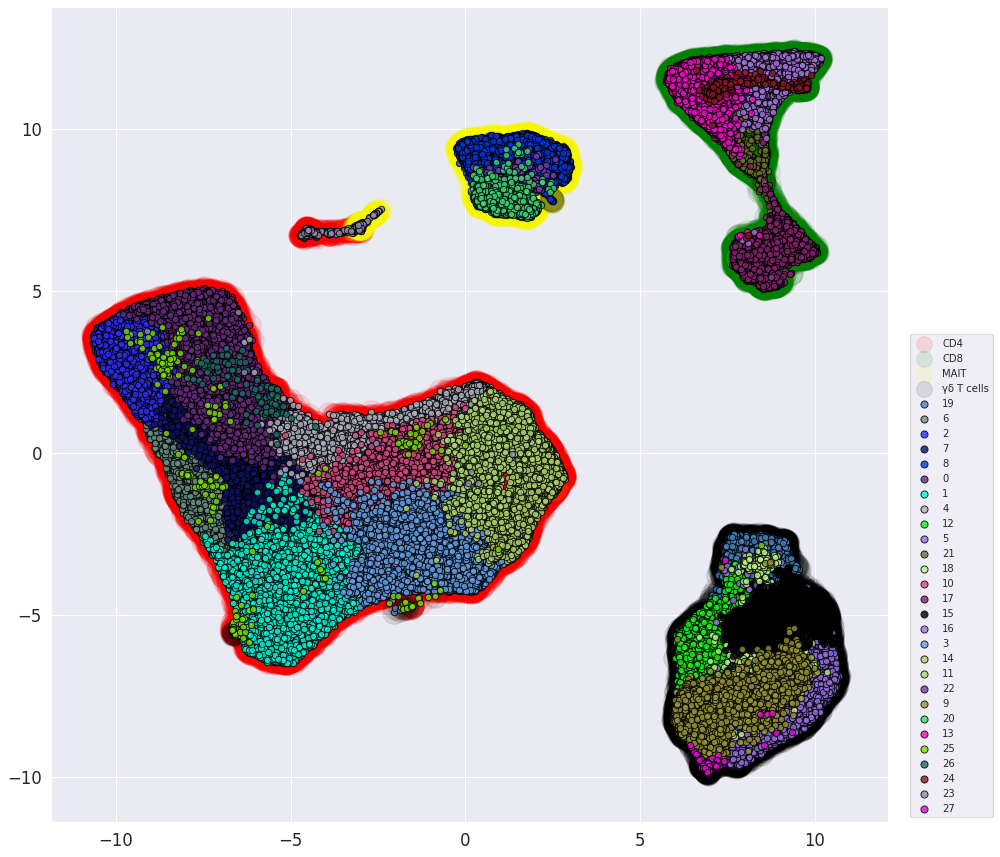

In [242]:
fig, ax = plt.subplots(figsize=(15, 15))
s = data.sample(frac=0.5)
colours = ['red', 'green', 'yellow', 'black']
for (label, cords), colour in zip(gate_polygon.items(), colours):
    #ax.plot(cords['x'], cords['y'], '-k', c=colour, linewidth=2, alpha=0.35)
    d = s[s.label == label][['umap0', 'umap1']].values
    ax.scatter(d[:, 0], d[:, 1], c=colour, s=550, alpha=0.1, label=label)
colours = [np.random.rand(3,) for x in range(0, 30)]
for cluster, c in zip(s.clusters.unique(), colours):
    d = s[s.clusters == cluster][['umap0', 'umap1']].values
    ax.scatter(d[:, 0], d[:, 1], c=[c], s=40, alpha=0.8, label=cluster, edgecolor='black',
              linewidth=1)
lgnd = ax.legend(loc="lower left", scatterpoints=1, fontsize=10, bbox_to_anchor=(1.02,0))
for i, _ in enumerate(lgnd.legendHandles):
    if i < 4:
        lgnd.legendHandles[i]._sizes = [250]
    else:
        lgnd.legendHandles[i]._sizes = [50]
fig.show()
fig.savefig('Phenograph.jpg')

In [228]:
mfi_summary = data.groupby(by='clusters').mean()

In [100]:
maits = data[data.label == 'hdbscan_mait'].index

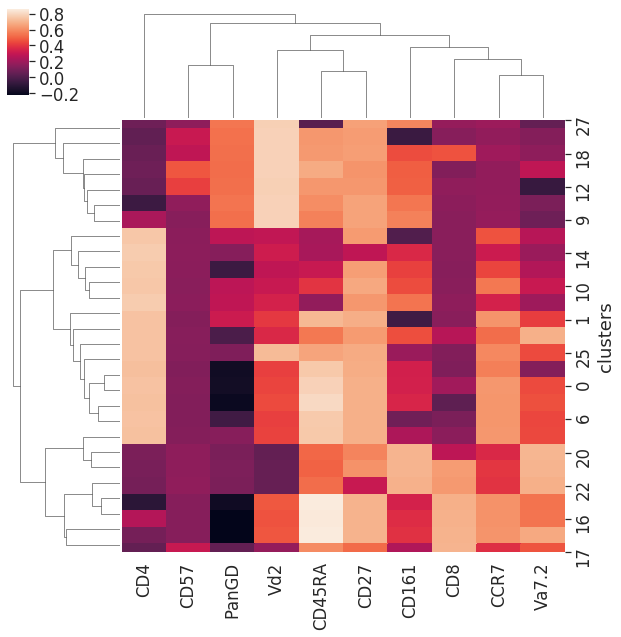

In [235]:
import seaborn as sns
sns.set(font_scale=1.5)
features = [x for x in features if all([y not in x for y in ['CD3', 'FSC', 'SSC', 'L/D']])]
sns.clustermap(mfi_summary[features])